In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
from sklearn.metrics import silhouette_score
import numpy as np
dataset=pd.read_csv('BR_mod.csv')

**K means clustering**

In [2]:
#Data reading and pre-processing
data_kmeans=pd.read_csv('BR_mod.csv')
normalized_data_kmeans=(data_kmeans-data_kmeans.mean())/data_kmeans.std()
normalized_data_kmeans=normalized_data_kmeans.fillna(normalized_data_kmeans.mean())

In [3]:
def pca(X,num_components):
  cov_mat = np.cov(X , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]
  X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose()).transpose()
  return X_reduced


In [4]:
#Applying PCA
reduced_data=pca(normalized_data_kmeans,2)
reduced_data_kmeans=pd.DataFrame(reduced_data,columns=['pc1','pc2'])
reduced_data_kmeans=reduced_data_kmeans-reduced_data_kmeans.min()

In [5]:
# function to find optimal 'K' . Takes arguement a number mentioning the number of 'K'.
def findk(range_k):
  epsilon = list(range(range_k)) # Initialisation of epsilon which would store cost function for each value of 'k' after final iteration.

  for k in range(1,range_k+1): # Number of clusters
      
      cluster = reduced_data_kmeans.copy() # Read data file into 'cluster'
      
      rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
      cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.
    
      centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
      centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
      centroids.set_index('new',inplace = True) 
      d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

      number_of_iterations = 20
      temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

      for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

          for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
              d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
          cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

          mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
          mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
          for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
              mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['pc1'].mean()
              mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['pc2'].mean()
          centroids.replace(list(centroids['pc1']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
          centroids.replace(list(centroids['pc2']),mean_y,inplace = True)
      
          z = list(range(k)) # Initialisation of z  and centroid of each cluster.
          
          for p in range(0,k): # This 'for' loop calculates square of distances between data points and centroid of each cluster.
              z[p] = ((cluster[cluster['centroid number'] == p+1][['pc1','pc2']] - centroids.iloc[p])**2).values.sum()
          temp_epsilon[i] = z[p]
          epsilon[k-1]=temp_epsilon[i] # The cost function after final iteration for each value of 'k' would be stored in epsilon.
      print(temp_epsilon[i])
      %reset_selective -f centroids # The dataframe 'centroids' is reset.
  return epsilon

In [6]:
rangek=10
epsilon=findk(rangek)

5174.243958212515
1916.5205985684238
0.0
338.07916565019764
257.34712629720195
160.60015312964214
124.28233494037048
72.66174092688166
125.63314166372865
124.31425829394456


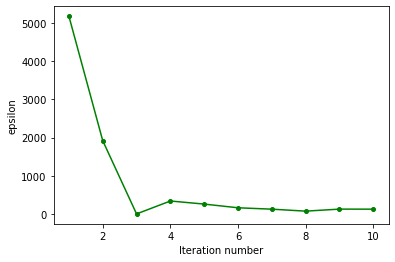

In [7]:
#Plotting mean square error vs number of clusters
import matplotlib.pyplot as plt
a = list(range(1,rangek+1)) #Number of iterations = 15
plt.plot(a, [x for x in epsilon], 'go-', linewidth=1.5, markersize=4)
plt.xlabel('Iteration number') 
plt.ylabel('epsilon')
plt.show()

In [8]:
# function to apply k-means clustering. Takes arguement a dataframe and number of clusters.
def k_means(cluster,k):
  # Read data file into 'cluster'
  rows = cluster.shape[0] # 'rows' contains the total number of rows in cluster data.
  cols = cluster.shape[1] # 'cols' contains the total number of columns in cluster data.

  centroids = cluster.loc[np.random.randint(1,rows+1,k)] # Randomly initialises 'k' no. of centroids.
  centroids['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
  centroids.set_index('new',inplace = True) 
  d = np.random.rand(rows) # Initialization of 'd' which would contain the centroid number closest to data point.

  number_of_iterations = 20
  temp_epsilon = list(range(number_of_iterations)) # 'temp_epsilon' is the sum of squares of distances between points and centroid of a cluster for each iteration.

  for i in range(0,number_of_iterations): # This 'for' loop is for iterations.

      for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
          d[j] = ((centroids - cluster.loc[j])**2).sum(axis = 1).idxmin()
      cluster['centroid number'] = d # A new column 'centroid number' is added to dataframe 'cluster'.

      mean_x = list(range(k)) # Initialisation of 'mean_x' which will store mean of 'x' values of each cluster.
      mean_y = list(range(k)) # Initialisation of 'mean_y' which will store mean of 'y' values of each cluster.
      for m in range(0,k): # This 'for' loop calculates mean of 'x' and 'y' values of each cluster.
          mean_x[m] = cluster[cluster['centroid number'] == (m+1)]['pc1'].mean()
          mean_y[m] = cluster[cluster['centroid number'] == (m+1)]['pc2'].mean()
      centroids.replace(list(centroids['pc1']),mean_x,inplace = True) # The 'centroids' are replaced with the new values.
      centroids.replace(list(centroids['pc2']),mean_y,inplace = True)
  return cluster

In [9]:
reduced_data_kmeans=k_means(reduced_data_kmeans,4)

In [10]:
reduced_data_kmeans.astype({'centroid number':'int32'}).dtypes
reduced_data_kmeans.head(30)

,pc1,pc2,centroid number
0,7.990945,4.861880,3.0
1,3.196923,3.950811,1.0
2,3.540167,4.179575,1.0
3,1.250752,4.627542,2.0
4,4.859843,4.202415,3.0
5,2.584819,4.693222,1.0
6,3.680127,5.248705,1.0
7,4.927929,3.348993,3.0
8,0.808044,3.722671,2.0
9,2.030195,4.533185,2.0


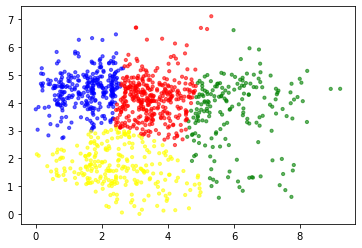

In [11]:
#plotting the clusters for K means
colors = ['red', 'blue', 'green','yellow']
reduced_data_kmeans['c'] = reduced_data_kmeans['centroid number'].map({ 1:colors[0], 2:colors[1],3:colors[2],4:colors[3]})
plt.scatter(reduced_data_kmeans.pc1,reduced_data_kmeans.pc2 ,c=reduced_data_kmeans.c,  alpha = 0.6, s=10)


**K Mediods**

In [12]:
def pca(X,num_components):
  cov_mat = np.cov(X , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]
  X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose()).transpose()
  return X_reduced
# Reading, pre processing and applying PCA 
data_kmediods=pd.read_csv('BR_mod.csv')
normalized_data_kmediods=(data_kmediods-data_kmediods.mean())/data_kmediods.std()
normalized_data_kmediods=normalized_data_kmediods.fillna(normalized_data_kmediods.mean())
reduced_data=pca(normalized_data_kmediods,2)
reduced_data_kmediods=pd.DataFrame(reduced_data,columns=['x','y'])
reduced_data_kmediods=reduced_data_kmediods-reduced_data_kmediods.min()

#function to perform k-mediods on 'dataframe' with 'k' number of clusters
def k_mediods(dataframe,k):
  rows = dataframe.shape[0] # 'rows' contains the total number of rows in cluster data.
  cols = dataframe.shape[1] # 'cols' contains the total number of columns in cluster data.
  mediods = dataframe.loc[np.random.randint(1,rows+1,k)]
  mediods['new'] = list(range(1,k+1)) # New indices 1 to k are set for the dataframe 'centroids'.
  mediods.set_index('new',inplace = True)
  d = np.random.rand(rows)
  for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
    d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
  dataframe['cluster']=d
  
  no_of_iterations=30
  
  for it in range(no_of_iterations):
    fg=1
    while(fg==1):
      fg=0
      o_random=dataframe.loc[np.random.randint(1,rows+1)]
      for i in range(len(mediods)):
        o_mediod=[mediods.iloc[i,0],mediods.iloc[i,1]]  #select a random point
        cluster_no=dataframe[dataframe['x']==o_mediod[0]]
        cluster_no=list(dataframe[dataframe['y']==o_mediod[1]]['cluster'])
        
        prev_cost=0
        after_cost=0
        temp_df=dataframe[dataframe['cluster']==cluster_no[0]]
        for a in range(len(temp_df)):
          prev_cost=prev_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) #cost before swapping
        mediods.iloc[i,0],mediods.iloc[i,1]=o_random['x'],o_random['y']
        for a in range(len(temp_df)):
          after_cost= after_cost+abs(mediods.iloc[i,0]-temp_df.iloc[i,0])+abs(mediods.iloc[i,1]-temp_df.iloc[i,1]) # cost after swapping
        if(after_cost>=prev_cost):
          mediods.iloc[i,0],mediods.iloc[i,1]=o_mediod[0],o_mediod[1] # if after cost >= prev cost, no need to swap
        else:
          fg=1
          break
    for j in range(0,rows): # This 'for' loop finds the centroid number closest to the data point.
      d[j] = (abs(mediods - dataframe.loc[j])).sum(axis = 1).idxmin()
    dataframe['cluster']=d
  return dataframe
  # print(mediods)


test_df=k_mediods(copy.deepcopy(reduced_data_kmediods),4)
test_df.astype({'cluster':'int32'}).dtypes

x          float64
y          float64
cluster      int32
dtype: object

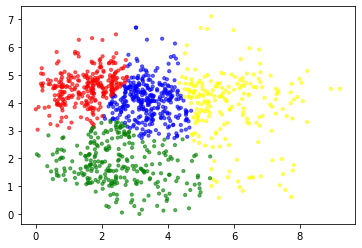

In [13]:
#plotting the clusters for K mediods
colors = ['red', 'blue', 'green','yellow']
test_df['c'] = test_df['cluster'].map({ 1:colors[0], 2:colors[1],3:colors[2],4:colors[3]})
plt.scatter(test_df.x,test_df.y ,c=test_df.c,  alpha = 0.6, s=10)

In [14]:
test_df.head(30)

,x,y,cluster,c
0,7.990945,4.861880,4.0,yellow
1,3.196923,3.950811,2.0,blue
2,3.540167,4.179575,2.0,blue
3,1.250752,4.627542,1.0,red
4,4.859843,4.202415,4.0,yellow
5,2.584819,4.693222,1.0,red
6,3.680127,5.248705,2.0,blue
7,4.927929,3.348993,4.0,yellow
8,0.808044,3.722671,1.0,red
9,2.030195,4.533185,1.0,red


**Hierarchical clustering**

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import copy
import numpy as np


def pca(X,num_components):
  cov_mat = np.cov(X , rowvar = False)
  eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)
  sorted_index = np.argsort(eigen_values)[::-1]
  sorted_eigenvalue = eigen_values[sorted_index]
  sorted_eigenvectors = eigen_vectors[:,sorted_index]
  eigenvector_subset = sorted_eigenvectors[:,0:num_components]
  X_reduced = np.dot(eigenvector_subset.transpose() , X.transpose()).transpose()
  return X_reduced

data_hierarchical=pd.read_csv('BR_mod.csv')
# Data preprocessing
normalized_data_hierarchical=(data_hierarchical-data_hierarchical.mean())/data_hierarchical.std()
normalized_data_hierarchical=normalized_data_hierarchical.fillna(normalized_data_hierarchical.mean())
#Applying PCA
reduced_data=pca(normalized_data_hierarchical,2)
reduced_data_hierarchical=pd.DataFrame(reduced_data,columns=['x','y'])
reduced_data_hierarchical=reduced_data_hierarchical-reduced_data_hierarchical.min()

In [16]:
def avg_linkage(pro_mat,merge_data):
# function to perform average linkage
  new_dist=[]
  for d in range(len(pro_mat)):
    if d not in merge_data:
      avg_dist=[]
      for x in merge_data:
        avg_dist.append(pro_mat[x][d])
      new_dist.append(sum(avg_dist)/len(avg_dist))
  new_dist.insert(1,0)
  return new_dist
      
def single_linkage(pro_mat,merge_data):
#function to perform single linkage
  new_dist=[]
  for d in range(len(pro_mat)):
    if d not in merge_data:
      min_dist=[]
      for x in merge_data:
        min_dist.append(pro_mat[x][d])
      new_dist.append(min(min_dist))
  new_dist.insert(1,0)
  return new_dist

def complete_linkage(pro_mat,merge_data):
# function to perform complete linkage
  new_dist=[]
  for d in range(len(pro_mat)):
    if d not in merge_data:
      max_dist=[]
      for x in merge_data:
        max_dist.append(pro_mat[x][d])
      new_dist.append(max(max_dist))
  new_dist.insert(1,0)
  return new_dist

def update_proximity(pro_mat,linkage):
 # function to update the proximity matrix
  min=100000001
  for d1 in range(len(pro_mat)):
    for d2 in range(d1+1,len(pro_mat)):
      if(pro_mat[d1][d2]<min):
        min=pro_mat[d1][d2]
  merge_data=[]
  for d1 in range(len(pro_mat)):
    for d2 in range(d1+1,len(pro_mat)):
      if(pro_mat[d1][d2]==min):
        if d1 not in merge_data:
          merge_data.append(d1)
        if d2 not in merge_data:
          merge_data.append(d2)
  
  new_distance=linkage(pro_mat,merge_data)
  new_len=len(pro_mat)-len(merge_data)+1
  
  updated_pro_mat=[]
  rshift=0
  cshift=0
  for d1 in range(len(pro_mat)):
    if(d1!=merge_data[1]):
      t=[]
      for d2 in range(len(pro_mat)):
        if d2!=merge_data[1]:
          t.append(pro_mat[d1][d2])
      updated_pro_mat.append(t)
          
  
  for i in range(new_len):
    updated_pro_mat[merge_data[0]][i]=new_distance[i]
    updated_pro_mat[i][merge_data[0]]=new_distance[i]
  # print(updated_pro_mat)
  
  return updated_pro_mat
  

def hierarchical(dataframe,linkage):
  rows = dataframe.shape[0] # 'rows' contains the total number of rows in cluster data.
  cols = dataframe.shape[1] # 'cols' contains the total number of columns in cluster data.
  dataframe['cluster']=[i+1 for i in range(rows)]
  proximity_matrix_list=[]
  proximity_matrix=[[0 for i in range(rows)] for j in range(rows)]
  for d1 in range(rows):
    for d2 in range(d1+1,rows):
      dist=((dataframe.iloc[d1,0]-dataframe.iloc[d2,0])**2+(dataframe.iloc[d1,1]-dataframe.iloc[d2,1])**2)**0.5
      proximity_matrix[d1][d2]=dist
      proximity_matrix[d2][d1]=dist
  proximity_matrix_list.append(proximity_matrix)
  
  while(len(proximity_matrix_list[-1])>1):
    temp_pro_mat=update_proximity(copy.deepcopy(proximity_matrix_list[-1]),linkage)
    
    proximity_matrix_list.append(temp_pro_mat)
  # ct=1
  # for i in proximity_matrix_list:
  #   print("Iteration : ",ct)
  #   print("number of clusters :" , len(i))
  #   ct=ct+1
  return proximity_matrix_list



In [ ]:
# hierarchical function takes two arguements : a dataframe and the type of linkage
# single_linkage for single linkage , complete_linkage for complete linkage and avg_linkage for average linkage
Hclusters=hierarchical(reduced_data_hierarchical,avg_linkage)
Hclusters_len=[len(i) for i in Hclusters]

In [ ]:
#Number of clusters in each iteration
for i in range(len(Hclusters_len)):
  print("Iteration : ",i+1)
  print("number of clusters :" , Hclusters_len[i])

Iteration :  1
number of clusters : 1097
Iteration :  2
number of clusters : 1096
Iteration :  3
number of clusters : 1095
Iteration :  4
number of clusters : 1094
Iteration :  5
number of clusters : 1093
Iteration :  6
number of clusters : 1092
Iteration :  7
number of clusters : 1091
Iteration :  8
number of clusters : 1090
Iteration :  9
number of clusters : 1089
Iteration :  10
number of clusters : 1088
Iteration :  11
number of clusters : 1087
Iteration :  12
number of clusters : 1086
Iteration :  13
number of clusters : 1085
Iteration :  14
number of clusters : 1084
Iteration :  15
number of clusters : 1083
Iteration :  16
number of clusters : 1082
Iteration :  17
number of clusters : 1081
Iteration :  18
number of clusters : 1080
Iteration :  19
number of clusters : 1079
Iteration :  20
number of clusters : 1078
Iteration :  21
number of clusters : 1077
Iteration :  22
number of clusters : 1076
Iteration :  23
number of clusters : 1075
Iteration :  24
number of clusters : 1074
I